In [2]:
import numpy as np

import matplotlib.pyplot as plt

%matplotlib notebook

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
%matplotlib notebook
with open('Chexpert_Train_DenseNet121_x_ray_bce_unique.npy', 'rb') as f:
    X_train_0 = np.load(f)
    y_train_0 = np.load(f)
    data_dict = np.load(f,allow_pickle=True).item()
    
    
print(data_dict.keys())

filename = np.array(data_dict['filename'])
patient_id = data_dict['patient_id']
sex = data_dict['sex']
age = data_dict['age']
view = data_dict['view']

X_train = X_train_0
y_train = y_train_0

N = len(filename)

print(X_train.shape, y_train.shape)

dict_keys(['filename', 'patient_id', 'sex', 'age', 'view'])
(223414, 1024) (223414, 14)


In [4]:
diseases = ['No Finding', #0
            'Enlarged Cardiomediastinum', #1
            'Cardiomegaly', #2
            'Lung Opacity', #3
            'Lung Lesion', #4
            'Edema', #5
            'Consolidation', #6
            'Pneumonia', #7
            'Atelectasis', #8
            'Pneumothorax', #9
            'Pleural Effusion', #10
            'Pleural Other', #11
            'Fracture', #12
            'Support Devices' #13
            ]

classes = ['Absent', 'Present', 'Uncertain', 'Not Mentioned']

In [5]:
from sklearn.model_selection import train_test_split 

#X_train, X_test, y_train, y_test = train_test_split(X_train_0, 
#                                                    y_train_0, 
#                                                    test_size=0.2, 
#                                                    random_state = 31415) 

print(y_train.shape)
print(X_train.shape)

(223414, 14)
(223414, 1024)


In [ ]:
import umap 
 
    
import matplotlib.pyplot as plt
#%matplotlib inline
    
np.random.seed(100) 
ump = umap.UMAP(n_neighbors=10, 
        min_dist=0.001, #used in paper 0.001
        #spread = ,
        n_components=2, 
        random_state=150, 
        n_epochs = 300,
        metric= 'euclidean') 
 
y_umap = ump.fit_transform(X_train) 
 
plt.figure() 
plt.scatter(y_umap[:,0], y_umap[:,1], c=y_train[:,0], s=0.01, cmap='Spectral') 
 
#cbar = plt.colorbar(boundaries=np.arange(3)-0.5) 
#cbar.set_ticks(np.arange(3)) 
#cbar.set_ticklabels(classes) 

In [7]:
#y_view = 

print(np.unique(view))

#print(np.array(view)=='AP')
y_viewAP = 2 * (np.array(view)=='AP')
y_viewL1 = 1 * (np.array(view)=='LL')
y_viewL2 = 1 * (np.array(view)=='RL')
y_viewL3 = 1 * (np.array(view)=='LATERAL')

y_view = y_viewAP + y_viewL1 + y_viewL2 + y_viewL3
#'''
#%matplotlib inline

plt.figure() 
plt.scatter(y_umap[:,0], y_umap[:,1], c=y_view, s=0.01, cmap='jet') 
 
cbar = plt.colorbar(boundaries=np.arange(4)-0.5) 
cbar.set_ticks(np.arange(4))
cbar.set_ticklabels(['PA', 'L', 'AP'])
#'''

['AP' 'LATERAL' 'LL' 'PA' 'RL']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
indexes_to_map_1 = [  2406,   3014,  13139,  13300,  13418,  13785,  15245,  15870,
        16956,  17973,  18085,  18126,  18361,  20191,  27816,  28333,
        28414,  31433,  37336,  37630,  38375,  39500,  43658,  45331,
        45538,  48029,  49270,  54460,  56311,  64217,  69764,  70214,
        82309,  87018,  88753,  88754,  88941,  89364,  90787,  94746,
        95901, 103451, 105206, 111890, 112528, 113083, 115073, 117296,
       120778, 126520, 127102, 128576, 131148, 135939, 139119, 140736,
       145936, 165121, 169169, 175600, 176073, 180073, 184812, 185180,
       187117, 190815, 191028, 191222, 191769, 198588, 199128, 199305,
       204504, 205446, 205856, 206436, 207791, 208420, 213456, 213630,
       215451, 217804, 217870, 221575, 221758, 221925, 222026, 222327] #Horizontal Artifact

indexes_to_map_2 = [  7269,  21652,  30221,  40022,  43295,  50768,  86190,  96111,
       100709, 104594, 108174, 113346, 139419, 154960, 156268, 185991,
       196461, 198773, 204020] #Noise

<IPython.core.display.Javascript object>

/usr/lib/python3/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':


<IPython.core.display.Javascript object>


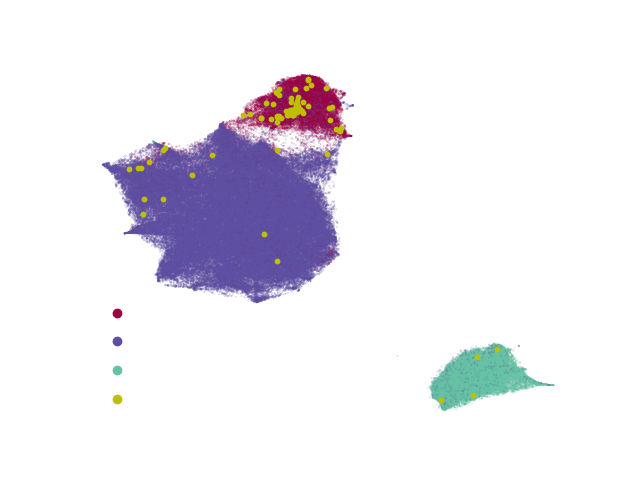

/usr/lib/python3/dist-packages/ipykernel_launcher.py:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [24]:
#%matplotlib inline
import matplotlib
from matplotlib.colors import ListedColormap
i = 7

def rotate_matrix(y_in, theta):
    tht = theta*np.pi/180
    R = np.array( [[np.cos(tht), -np.sin(tht)], [np.sin(tht), np.cos(tht)]] )
    y_out = R.dot(y_in.T).T
    return y_out

plt.figure() 
#Topological Lung X-ray Background
#plt.scatter(y_umap[:,0], y_umap[:,1], c='gray', alpha=1, s=0.1, cmap='Spectral') 

#stub_labels = y_train[:,i] != 3

y_umap2 = rotate_matrix(y_umap, 55)

cmap = matplotlib.cm.get_cmap('Spectral')
first_color = cmap(0.0)
third_color = cmap(1.0)
second_color = cmap(0.8)
fourth_color = 'y'

cmap2 = ListedColormap(np.array([first_color, second_color, third_color, fourth_color]))

y_2 = np.concatenate((y_umap2, y_umap_IM))
y_2_label = np.concatenate((y_view,4* np.ones(len(y_umap_IM))))

#plt.scatter(y_umap[stub_labels,0], y_umap[stub_labels,1], c=y_train[stub_labels,i], s=1)
scatter = plt.scatter(-y_2[:,0], y_2[:,1], c=y_2_label, s=0.01, cmap=cmap2) 

handles, labels = scatter.legend_elements()
handles = [handles[0], handles[2], handles[1], handles[3]]
labels = [labels[0], labels[1], labels[2], labels[3]]

plt.scatter(-y_umap_IM[:,0], y_umap_IM[:,1], color='y', s=10, marker='o', alpha=1)


lgd = plt.legend(handles, labels,
                    loc="lower left", prop={'size': 14})
lgd.get_texts()[0].set_text('    ') #PA
lgd.get_texts()[1].set_text('    ') #AP
lgd.get_texts()[2].set_text('    ') #L
lgd.get_texts()[3].set_text('                         ') #
lgd.get_frame().set_alpha(0)
lgd.get_frame().set_facecolor((0, 0, 1, 0))
lgd.get_frame().set_edgecolor((0,0,0,0.1))


plt.xticks([])
plt.yticks([])
plt.axis('off')

plt.savefig('figures_softmax/chexpert2_UMAP_cxrbceloss.png', dpi=400, transparent=True)

#cbar = plt.colorbar(boundaries=np.arange(len(classes))-0.5) 
#cbar.set_ticks(np.arange(len(classes)+1)) 
#cbar.set_ticklabels(classes)
#plt.title(diseases[i])